Kanika Thombre
22070126052
AIML A3

TASK 1

DIFFERENT ACTIVATION FUNCTIONS

**Linear Activation Function-**
A linear activation function is a function used in neural networks that returns the input value directly as the output. In mathematical terms, it can be represented as f(x)=x. This function does not apply any transformation to the input, allowing for linear relationships between the input and output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def linear(x):
  return x

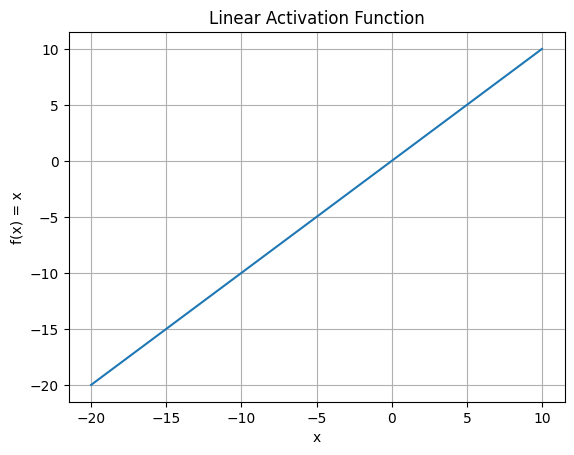

In [ ]:
x = np.linspace(-20, 10, 300) #(start,stop,num of values)
y = linear(x)
plt.plot(x, y)
plt.title('Linear Activation Function')
plt.xlabel('x')
plt.ylabel('f(x) = x')
plt.grid()
plt.show()

**Sigmoid Function-**
A sigmoid function is a type of activation function commonly used in neural networks, which maps any input value to a value between 0 and 1.
y=1/(1+e^(-X))


In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

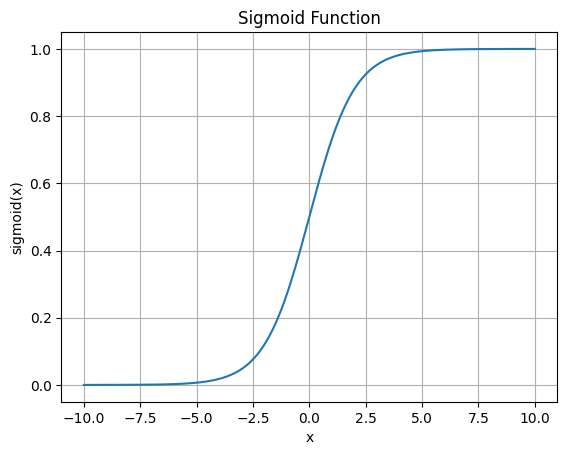

In [ ]:
x = np.linspace(-10, 10, 300)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid()
plt.show()

**Hyperbolic Tangent (tanh) Function-**
It outputs values between -1 and 1, making it zero-centered and useful for mapping inputs to a range around zero. y=tan(X)

In [ ]:
def tanh(x):
  return np.tanh(x)

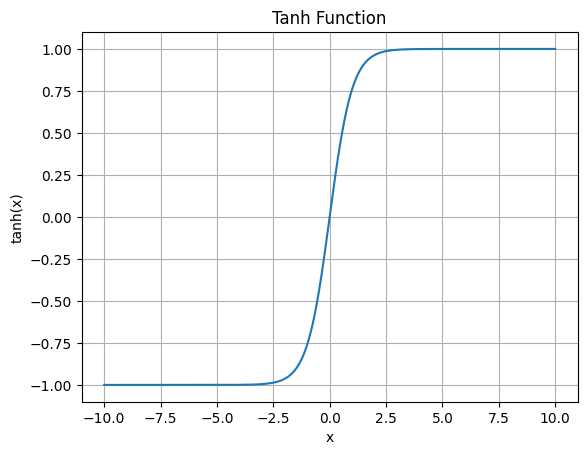

In [ ]:
x = np.linspace(-10, 10, 300)
y = tanh(x)
plt.plot(x, y)
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid()
plt.show()

**ReLU (Rectified Linear Unit) Function-**
y=max(0,X)
It outputs the input if it is positive; otherwise, it outputs zero, helping to mitigate the vanishing gradient problem.

In [ ]:
def relu(x):
  return np.maximum(0, x)

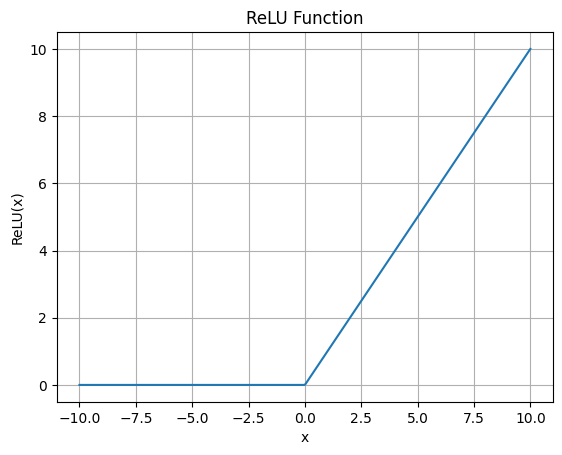

In [ ]:
x = np.linspace(-10, 10, 400)
y = relu(x)
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.show()

**Leaky ReLU Function-**
The Leaky ReLU function is an attempt to fix the "dying ReLU" problem by allowing a small, non-zero gradient when the input is negative.

In [ ]:
def leaky_relu(x, alpha=0.05):
  return np.where(x > 0, x, alpha * x)


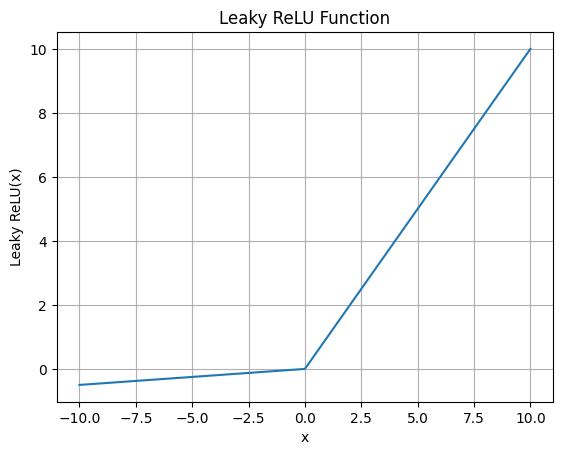

In [ ]:
x = np.linspace(-10, 10, 400)
y = leaky_relu(x)
plt.plot(x, y)
plt.title('Leaky ReLU Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid()
plt.show()

**Softmax Function-**
The softmax function is often used in the output layer of a neural network to represent a probability distribution.
y=exp(X)/sum(exp(x))


In [ ]:
def softmax(x):
  exp_x = np.exp(x - np.max(x)) # Shift for numerical stability
  return exp_x / exp_x.sum(axis=0)

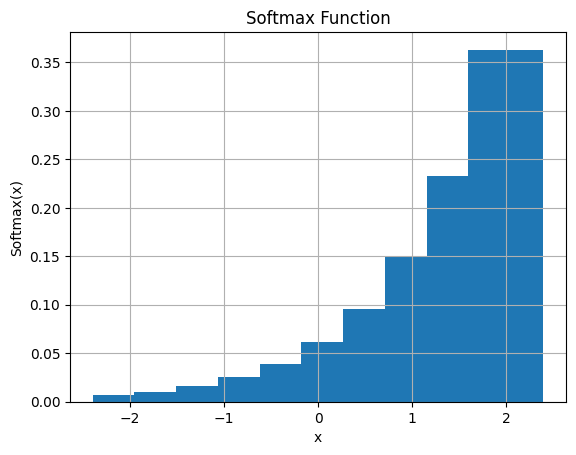

In [ ]:
x = np.linspace(-2, 2, 10)
y = softmax(x)
plt.bar(x, y)
plt.title('Softmax Function')
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.grid()
plt.show()

TASK 2-

NN from scratch

In [ ]:
import numpy as np
#from sklearn.metrics import accuracy_score
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    # Initialize weights
    self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
    self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
    # Initialize the biases
    self.bias_hidden = np.zeros((1, self.hidden_size))
    self.bias_output = np.zeros ((1, self.output_size))

  def sigmoid(self,x):
    return 1/(1+ np.exp(-x))

  def sigmoid_derivative(self,x):
    return x*(1-x)

  def feedforward (self, X):
    # Input to hidden
    self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
    self.hidden_output = self.sigmoid(self.hidden_activation)

    # Hidden to output
    self.output_activation = np.dot (self.hidden_output, self.weights_hidden_output) + self.bias_output
    self.predicted_output = self.sigmoid(self.output_activation)

    return self.predicted_output

  def backward(self, X, y, learning_rate):
    # Compute the output layer error
    output_error = y - self.predicted_output
    output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

    # Compute the hidden layer error
    hidden_error = np.dot (output_delta, self.weights_hidden_output.T)
    hidden_delta = hidden_error * self.sigmoid_derivative (self.hidden_output)

    # Update weights and biases
    self.weights_hidden_output += np.dot(self.hidden_output. T, output_delta) * learning_rate
    self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    self.weights_input_hidden += np.dot (X.T, hidden_delta) * learning_rate
    self.bias_hidden += np.sum (hidden_delta, axis=0, keepdims=True) * learning_rate

  def train(self, X, y, epochs, learning_rate):
    for epoch in range(epochs):
      output = self.feedforward(X)
      self.backward(X, y, learning_rate)
      if epoch % 5000 == 0:
        loss = np.mean (np.square (y - output))
        print("Epoch:", {epoch}," Loss:", {loss})

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y= np.array([[1], [1], [0], [1]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train (X, y, epochs=70000, learning_rate=0.1)

# Test the trained model
output = nn.feedforward(X)
print("Predictions after training:")
print (output)

Epoch: {0}  Loss: {0.23149304557036943}
Epoch: {5000}  Loss: {0.0013905209996642556}
Epoch: {10000}  Loss: {0.0005380735140309942}
Epoch: {15000}  Loss: {0.0003216170456451523}
Epoch: {20000}  Loss: {0.00022595705645029305}
Epoch: {25000}  Loss: {0.00017276051371844267}
Epoch: {30000}  Loss: {0.00013913963850206137}
Epoch: {35000}  Loss: {0.00011607662212970228}
Epoch: {40000}  Loss: {9.932724011282371e-05}
Epoch: {45000}  Loss: {8.664085279495813e-05}
Epoch: {50000}  Loss: {7.671670961712514e-05}
Epoch: {55000}  Loss: {6.875238750004196e-05}
Epoch: {60000}  Loss: {6.222687465962715e-05}
Epoch: {65000}  Loss: {5.678761453047258e-05}
Predictions after training:
[[0.99319388]
 [0.99973354]
 [0.01060126]
 [0.99293104]]


TASK 3-

Applying NN on a dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.drop(['id'], axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Encode the target variable (M = 1, B = 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Split the data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
class NeuralNetwork:
  def __init__(self, input_size, hidden_size, output_size,learning_rate=0.01):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.learning_rate = learning_rate

# Initialize weights and biases
    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.zeros((1, self.output_size))

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  def sigmoid_derivative(self, z):
    return z * (1 - z)
  def forward(self, X):
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = self.sigmoid(self.z2)
    return self.a2
  def backward(self, X, y, output):
    m = X.shape[0]
  # Calculate the error
    d_output = (output - y) / m
    d_hidden = np.dot(d_output, self.W2.T) * self.sigmoid_derivative(self.a1)

  # Update weights and biases
    self.W2 -= self.learning_rate * np.dot(self.a1.T, d_output)
    self.b2 -= self.learning_rate * np.sum(d_output, axis=0, keepdims=True)
    self.W1 -= self.learning_rate * np.dot(X.T, d_hidden)
    self.b1 -= self.learning_rate * np.sum(d_hidden,axis=0, keepdims=True)
  def train(self, X, y, iterations=10000):
    for i in range(iterations):
      output = self.forward(X)
      self.backward(X, y, output)
  def predict(self, X):
    output = self.forward(X)
    return [1 if i > 0.5 else 0 for i in output]


In [ ]:
# Convert target variable to numpy array and reshape
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


In [ ]:
# Initialize the neural network
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=10, output_size=1, learning_rate=0.01)
# Train the neural network
nn.train(X_train, y_train, iterations=10000)
# Make predictions
y_pred = nn.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6228070175438597


Conclusion - The implementation of a simple neural network from scratch using the Breast Cancer Wisconsin (Diagnostic) dataset shows that basic neural networks can perform binary classification tasks but may require further tuning and complexity to achieve higher accuracy, as demonstrated by the current 62% accuracy.